In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
df=pd.read_csv('mcdonalds.csv')
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [7]:
df.shape

(1453, 15)

In [5]:
df.columns


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [8]:
df.dtypes

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object

In [11]:
df['yummy'].value_counts()

Yes    803
No     650
Name: yummy, dtype: int64

In [12]:
df['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [13]:
df['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [14]:
df['convenient'].value_counts()

Yes    1319
No      134
Name: convenient, dtype: int64

In [15]:
df['Age'].value_counts()

55    53
60    38
37    37
59    36
57    36
52    36
58    35
36    35
49    34
62    34
50    34
32    33
44    32
56    32
64    32
53    31
26    31
24    30
35    30
51    30
47    30
42    30
23    30
39    29
29    28
34    28
30    28
38    27
40    27
31    27
25    26
33    26
61    26
67    26
48    26
43    25
27    25
63    25
54    24
41    23
22    23
65    23
45    22
20    21
46    19
28    18
66    17
21    16
18    16
70    15
69    14
68    13
19    10
71     1
Name: Age, dtype: int64

In [17]:
MD_x = df.iloc[:, 0:11].apply(lambda x: (x == "Yes").astype(int))
col_means = np.round(MD_x.mean(), 2)

print(col_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

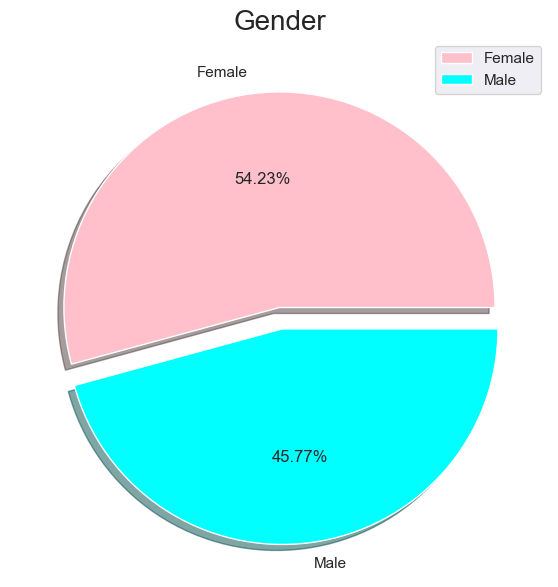

In [22]:
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['pink', 'cyan']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors=colors, explode=explode, labels=labels, shadow=True, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

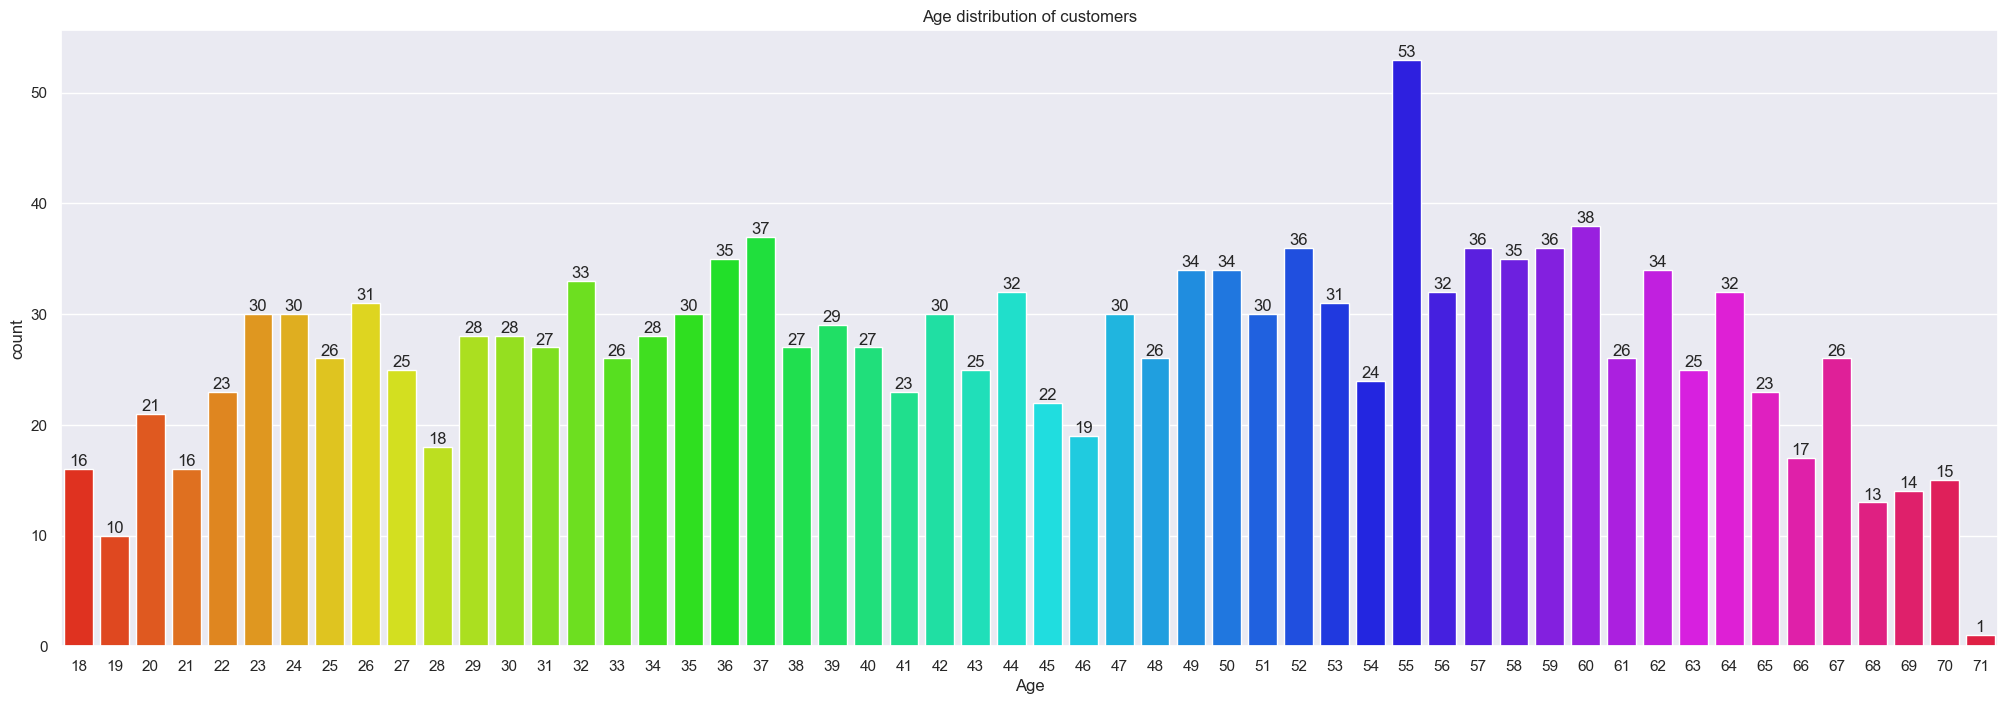

In [21]:
plt.rcParams['figure.figsize'] = (25, 8)
sns.set(style="darkgrid")
f = sns.countplot(x=df['Age'], palette='hsv')
f.bar_label(f.containers[0])
plt.title('Age distribution of customers')
plt.show()

/var/folders/t2/414jbpx50qsdvgvrgs4hb4gh0000gn/T/ipykernel_1801/865543641.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x="Like", y="Age", data=df, orient="v", height=5, aspect=2, palette="Set2", kind="swarm")


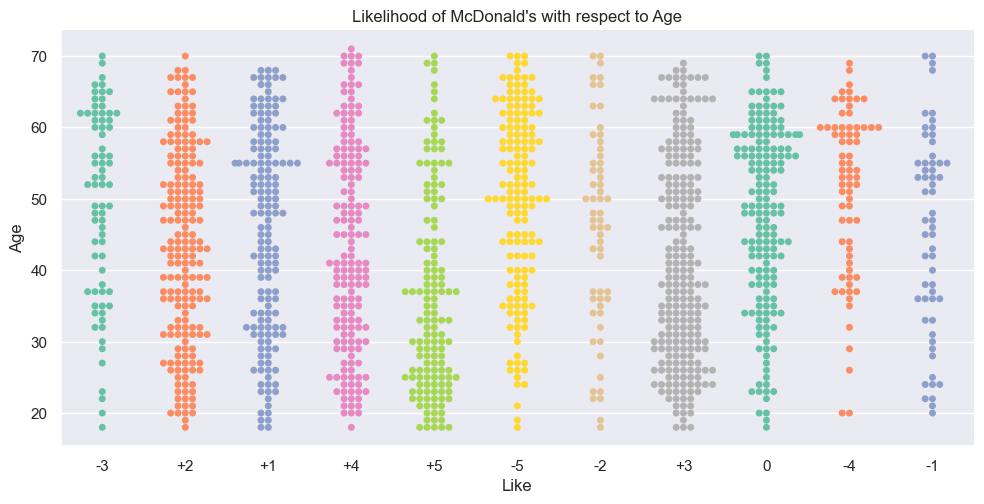

In [23]:
df['Like'] = df['Like'].replace({'I hate it!-5': '-5', 'I love it!+5': '+5'})
sns.catplot(x="Like", y="Age", data=df, orient="v", height=5, aspect=2, palette="Set2", kind="swarm")
plt.title('Likelihood of McDonald\'s with respect to Age')
plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder

def labelling(df, column):
    df[column] = LabelEncoder().fit_transform(df[column])
    return df

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for category in cat:
    df = labelling(df, category)


In [25]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


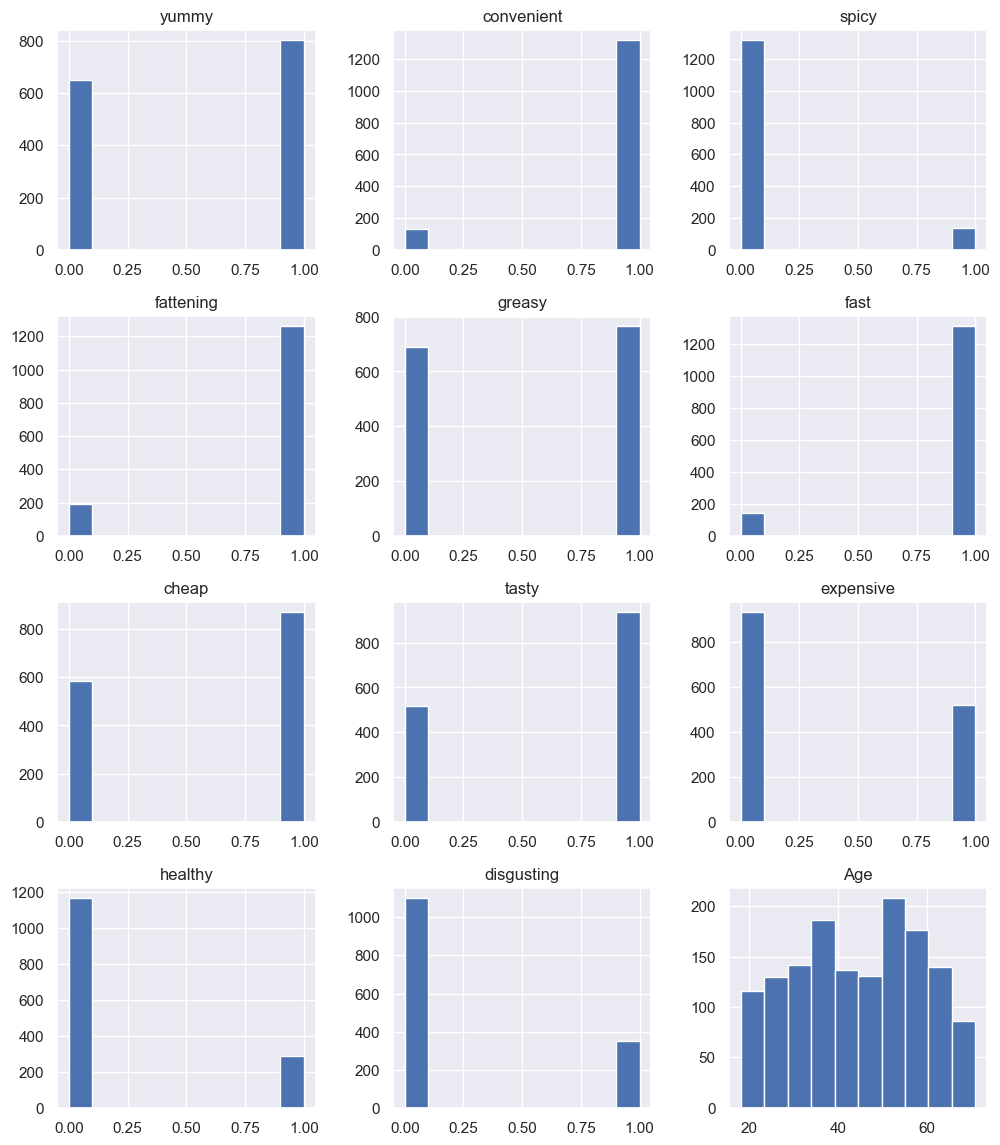

In [26]:
plt.rcParams['figure.figsize'] = (12, 14)

# Create histograms for each attribute
df.hist()
plt.show()

In [27]:
df_eleven = df.loc[:,cat]
df_eleven

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [28]:
x = df.loc[:,cat].values
x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [34]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
import pandas as pd

# Assuming x is your input data
pca_data = preprocessing.scale(x)

pca = PCA(n_components=11)
pc = pca.fit_transform(pca_data)

# Creating DataFrame with PC components
names = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11']
pf = pd.DataFrame(data=pc, columns=names)

pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144
...,...,...,...,...,...,...,...,...,...,...,...
1448,3.499105,1.069999,0.148971,-0.195977,0.787923,1.016536,-1.977414,0.049487,-0.964269,0.070579,0.155016
1449,-1.568786,0.899328,1.192503,-0.286497,2.234500,1.258306,-1.764159,-1.705500,-0.232987,-0.036497,0.039392
1450,-0.414275,1.810438,-1.071948,-0.901031,-0.750299,0.065975,0.720962,-0.397984,-0.344847,0.098558,0.118205
1451,-2.803630,0.562759,2.278887,0.083924,0.080147,-0.969368,-0.384558,0.604123,-0.211434,0.083127,0.077614


In [30]:
pca.explained_variance_ratio_

array([0.25556637, 0.14834762, 0.12546909, 0.09826971, 0.08348356,
       0.07109102, 0.06498559, 0.05384477, 0.04762809, 0.02796379,
       0.0233504 ])

In [31]:
np.cumsum(pca.explained_variance_ratio_)

array([0.25556637, 0.40391399, 0.52938308, 0.62765279, 0.71113635,
       0.78222737, 0.84721295, 0.90105773, 0.94868581, 0.9766496 ,
       1.        ])

In [33]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame(data=loadings.T, columns=pc_list, index=df_eleven.columns)

loadings_df

/Users/sumitjena/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.406955,0.282615,-0.259588,0.026237,0.346857,-0.124916,0.159878,0.016587,-0.195341,0.691446,-0.091851
convenient,-0.308827,-0.045682,-0.317151,-0.009424,-0.437148,0.188966,-0.661814,0.150033,-0.336539,0.028831,0.021460
spicy,-0.023320,0.069982,0.020170,0.845496,-0.185551,0.438661,0.214188,-0.027835,0.025239,0.058187,-0.041960
fattening,0.177861,-0.205590,-0.608077,-0.023396,0.086934,0.107520,-0.023851,-0.720478,0.105052,-0.020311,-0.074626
greasy,0.267796,-0.136300,-0.389568,0.330854,0.343713,-0.278329,-0.307300,0.487275,0.346137,-0.015160,-0.031047
fast,-0.213039,-0.282441,-0.211395,0.090363,-0.568939,-0.572734,0.392436,0.055976,0.099235,0.017917,-0.054448
cheap,-0.289134,-0.575032,0.125157,0.114477,0.256981,0.020657,-0.008895,-0.064667,-0.062027,0.060323,0.691923
tasty,-0.426115,0.242199,-0.269648,0.072691,0.286099,-0.053053,0.197364,0.059289,-0.213587,-0.713426,0.006426
expensive,0.290944,0.567528,-0.183298,0.035510,-0.207362,-0.171160,0.015198,-0.061727,-0.009675,0.029581,0.693614
healthy,-0.266839,0.201031,0.367814,0.301990,0.051787,-0.446166,-0.449446,-0.446110,0.219269,-0.054544,-0.089903


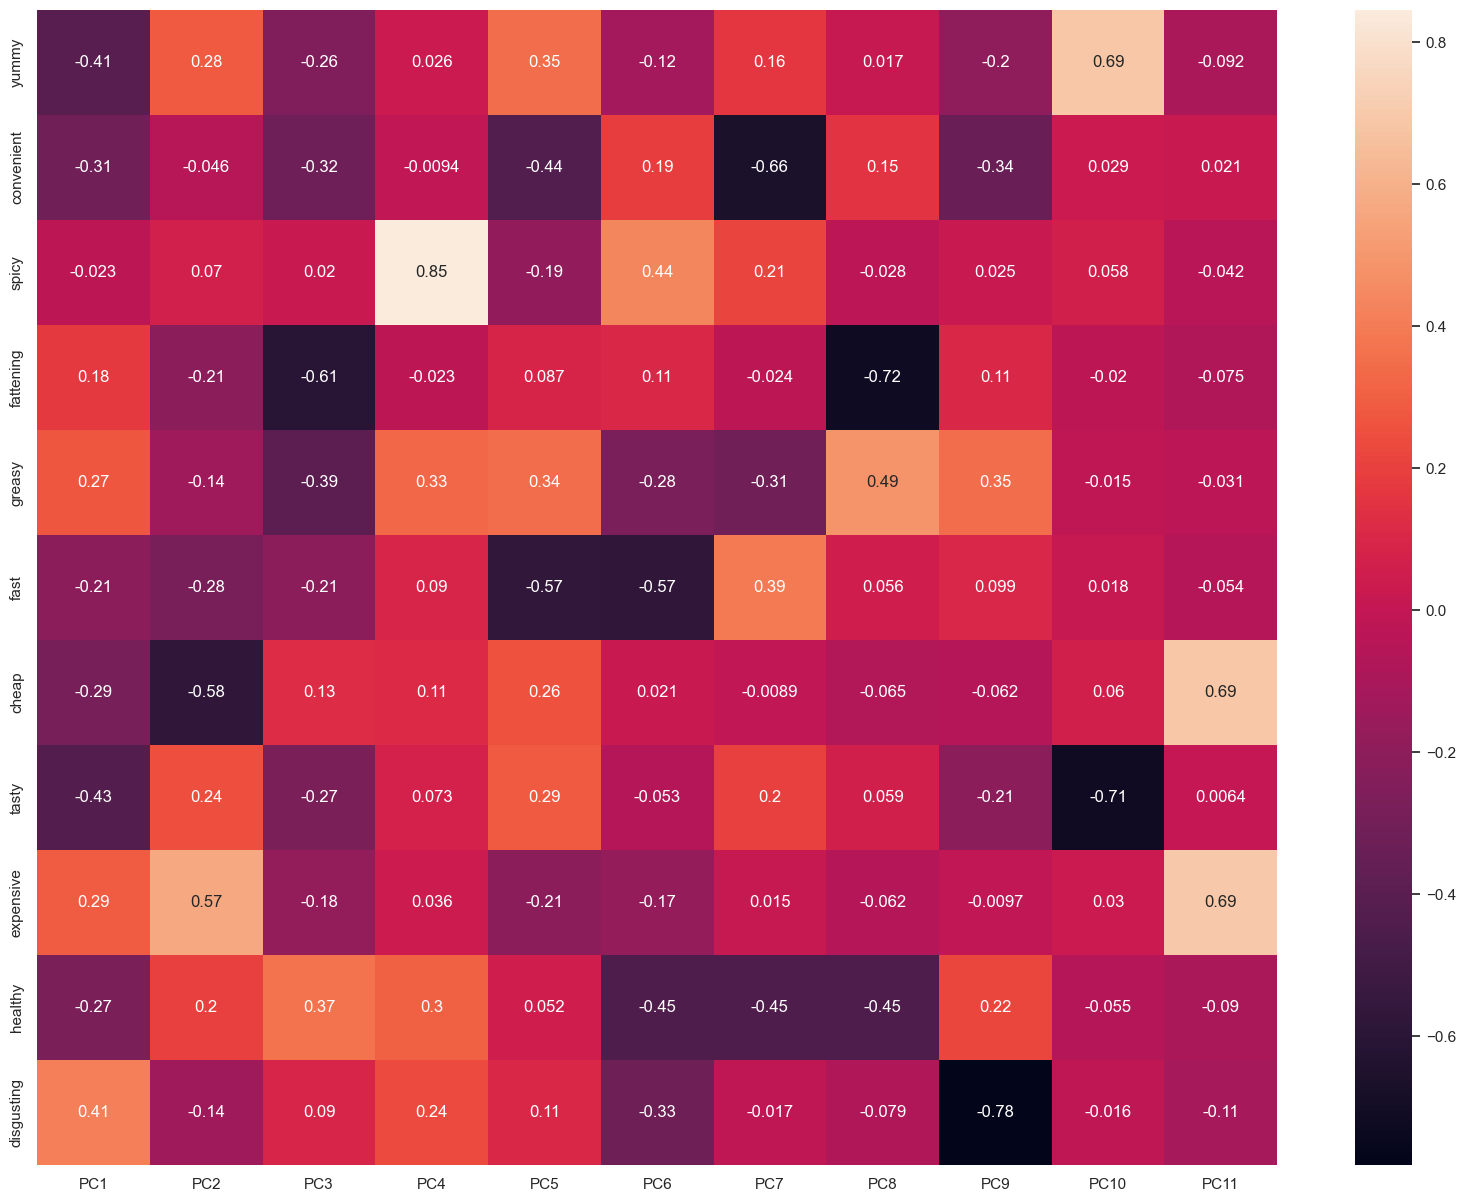

In [35]:
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True)
plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for matplotlib-venn from https://files.pythonhosted.org/packages/b1/f4/12ea88962cd17acb58bfcce1b93ce256f591698f9adb247de3eea630f590/matplotlib_venn-0.11.10-py3-none-any.whl.metadata
  Obtaining dependency information for adjustText from https://files.pythonhosted.org/packages/86/68/2514c33e8afcdfb41eef05580e3c8ddb0f7d1fde7fbc84c9d3bb43286d53/adjustText-1.0.4-py3-none-any.whl.metadata
  Created wheel for bioinfokit: filename=bioinfokit-2.1.3-py3-none-any.whl size=59056 sha256=162df8d9a523ec2ce382b4c8558d599a0f5e82f42ff1396846f6cd400ea7f859
  Stored in directory: /Users/sumitjena/Library/Caches/pip/wheels/ac/67/a7/4e0b4172d5415933127e819d7d7080ae08a6220949ad2f6de5
Successfully built bioinfokit

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


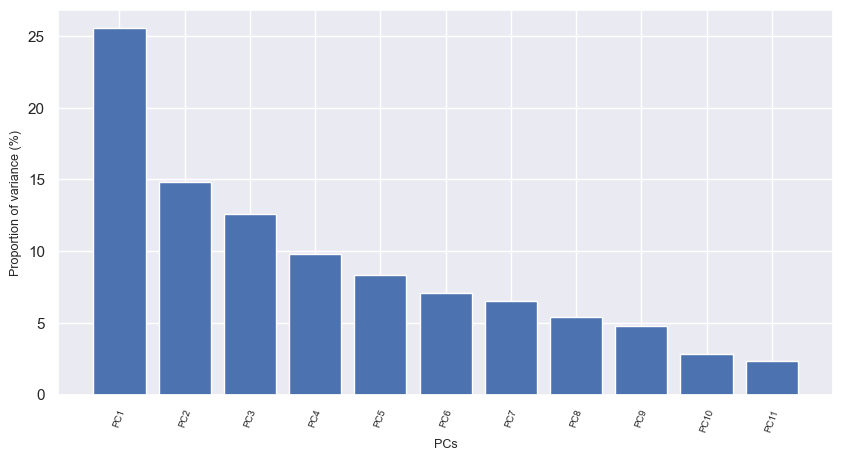

In [36]:
# Install bioinfokit library
!pip install bioinfokit

from bioinfokit.visuz import cluster
import matplotlib.pyplot as plt

# Assuming you have already performed PCA and have the pca object
# pc_list and pca.explained_variance_ratio_ should be available

# Create scree plot
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_], show=True, dim=(10, 5))
plt.show()


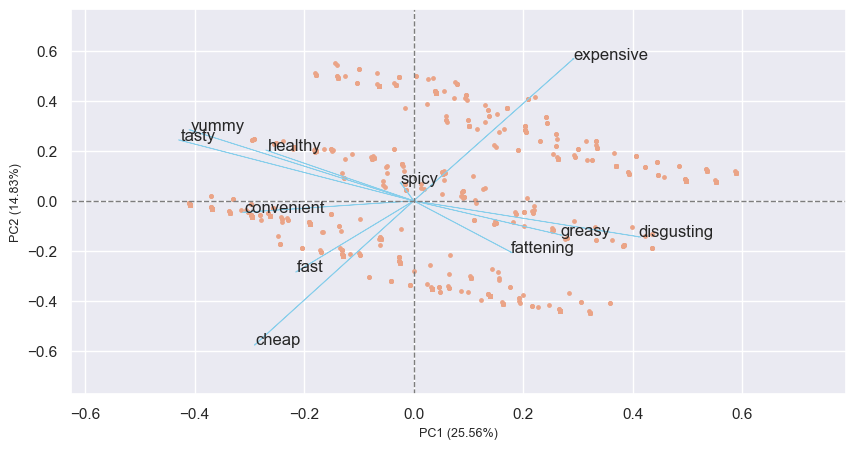

In [38]:
# get PC scores
pca_scores = PCA().fit_transform(x)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))


In [41]:
pip install yellowbrick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 823.8 kB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/Users/sumitjena/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sumitjena/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sumitjena/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sumitjena/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Use

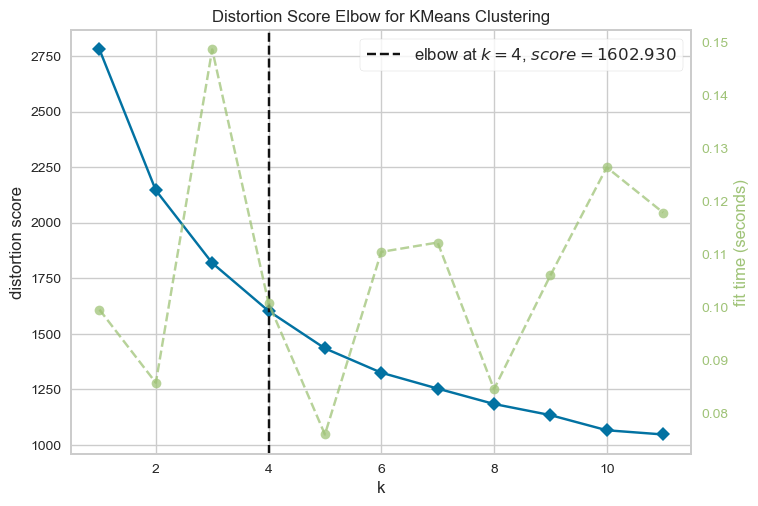

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
# Install yellowbrick library
# !pip install yellowbrick

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Assuming df_eleven is your data
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 12)).fit(df_eleven)
visualizer.show()


In [44]:
from sklearn.cluster import KMeans

# Assuming df_eleven is your data
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)

# Assign cluster labels to the DataFrame
df['cluster_num'] = kmeans.labels_

# Print cluster labels for each data point
print(kmeans.labels_)

# Print within-cluster sum of squares
print(kmeans.inertia_)

# Print the number of iterations
print(kmeans.n_iter_)

# Print the location of cluster centroids
kmeans.cluster_centers_


[1 2 2 ... 2 3 0]
1603.3394119101072
7


/Users/sumitjena/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[0.02057613, 0.67489712, 0.08230453, 0.91769547, 0.70781893,
        0.74897119, 0.06584362, 0.09465021, 0.89300412, 0.0617284 ,
        0.72427984],
       [0.02272727, 0.89285714, 0.07467532, 0.92532468, 0.66233766,
        0.9512987 , 0.92207792, 0.1525974 , 0.01298701, 0.07142857,
        0.38311688],
       [0.85227273, 0.96875   , 0.12784091, 0.90625   , 0.5625    ,
        0.86363636, 0.10511364, 0.92613636, 0.82670455, 0.19034091,
        0.09943182],
       [0.89272727, 0.98      , 0.08727273, 0.78727273, 0.34727273,
        0.96181818, 0.96909091, 0.98181818, 0.01454545, 0.33636364,
        0.04363636]])

In [45]:
#To see each cluster size
from collections import Counter
Counter(kmeans.labels_)

Counter({1: 308, 2: 352, 3: 550, 0: 243})

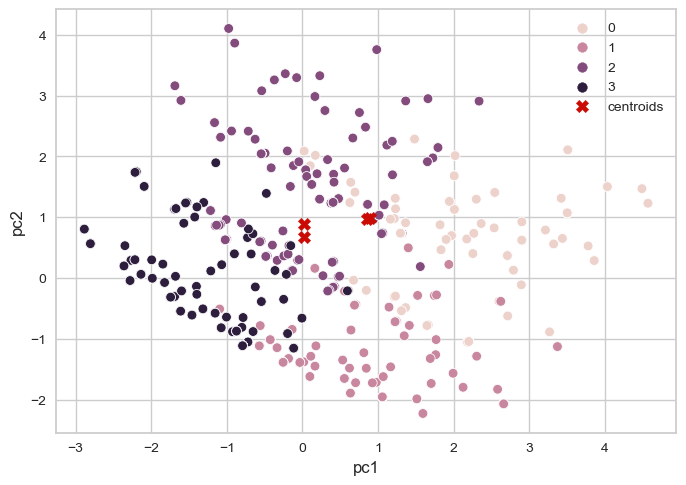

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming pf is your DataFrame with principal components
# and kmeans is your KMeans model

sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()


In [47]:
# Segments

from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(df['cluster_num'],df['Like'])
#Reordering cols
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,89,27,31,18,13,37,13,7,8,0,0
1,54,36,34,29,25,53,32,31,12,2,0
2,5,4,6,6,10,37,47,64,74,52,47
3,4,4,2,6,10,42,60,85,135,106,96


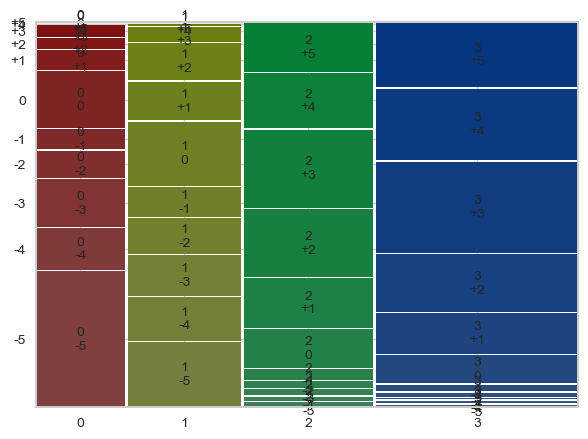

In [48]:
#MOSAIC PLOT
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

In [49]:
#Mosaic plot gender vs segment
crosstab_gender =pd.crosstab(df['cluster_num'],df['Gender'])
crosstab_gender

Gender,Female,Male
cluster_num,,
0,101,142
1,183,125
2,173,179
3,331,219


<Axes: xlabel='cluster_num', ylabel='Age'>

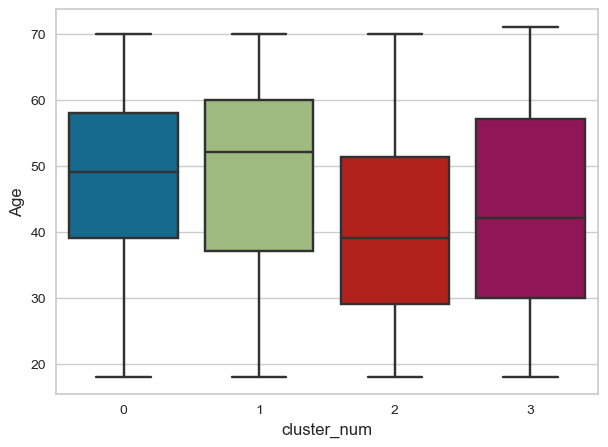

In [50]:
#box plot for age

sns.boxplot(x="cluster_num", y="Age", data=df)

In [51]:
#Calculating the mean
#Visit frequency
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.683128
1,1,2.818182
2,2,2.522727
3,3,2.590909


In [52]:
#Like
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,7.407407
1,1,6.175325
2,2,3.213068
3,3,2.990909


In [53]:
#Gender
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.584362
1,1,0.405844
2,2,0.508523
3,3,0.398182


In [54]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.584362,7.407407,2.683128
1,1,0.405844,6.175325,2.818182
2,2,0.508523,3.213068,2.522727
3,3,0.398182,2.990909,2.590909


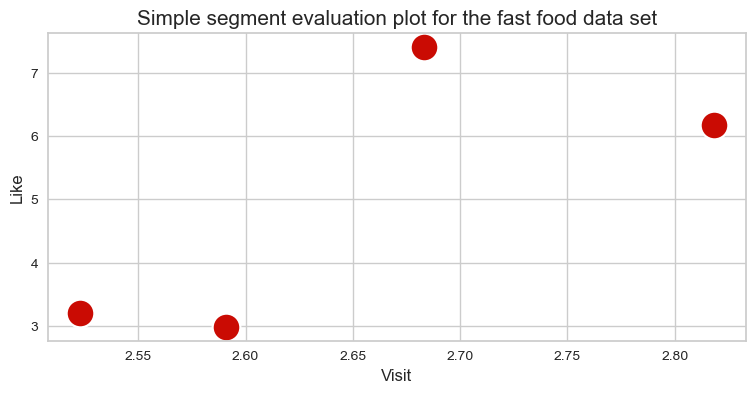

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'segment' is your DataFrame
plt.figure(figsize=(9, 4))
sns.scatterplot(x="VisitFrequency", y="Like", data=segment, s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set", fontsize=15)
plt.xlabel("Visit", fontsize=12)
plt.ylabel("Like", fontsize=12)
plt.show()

In [56]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

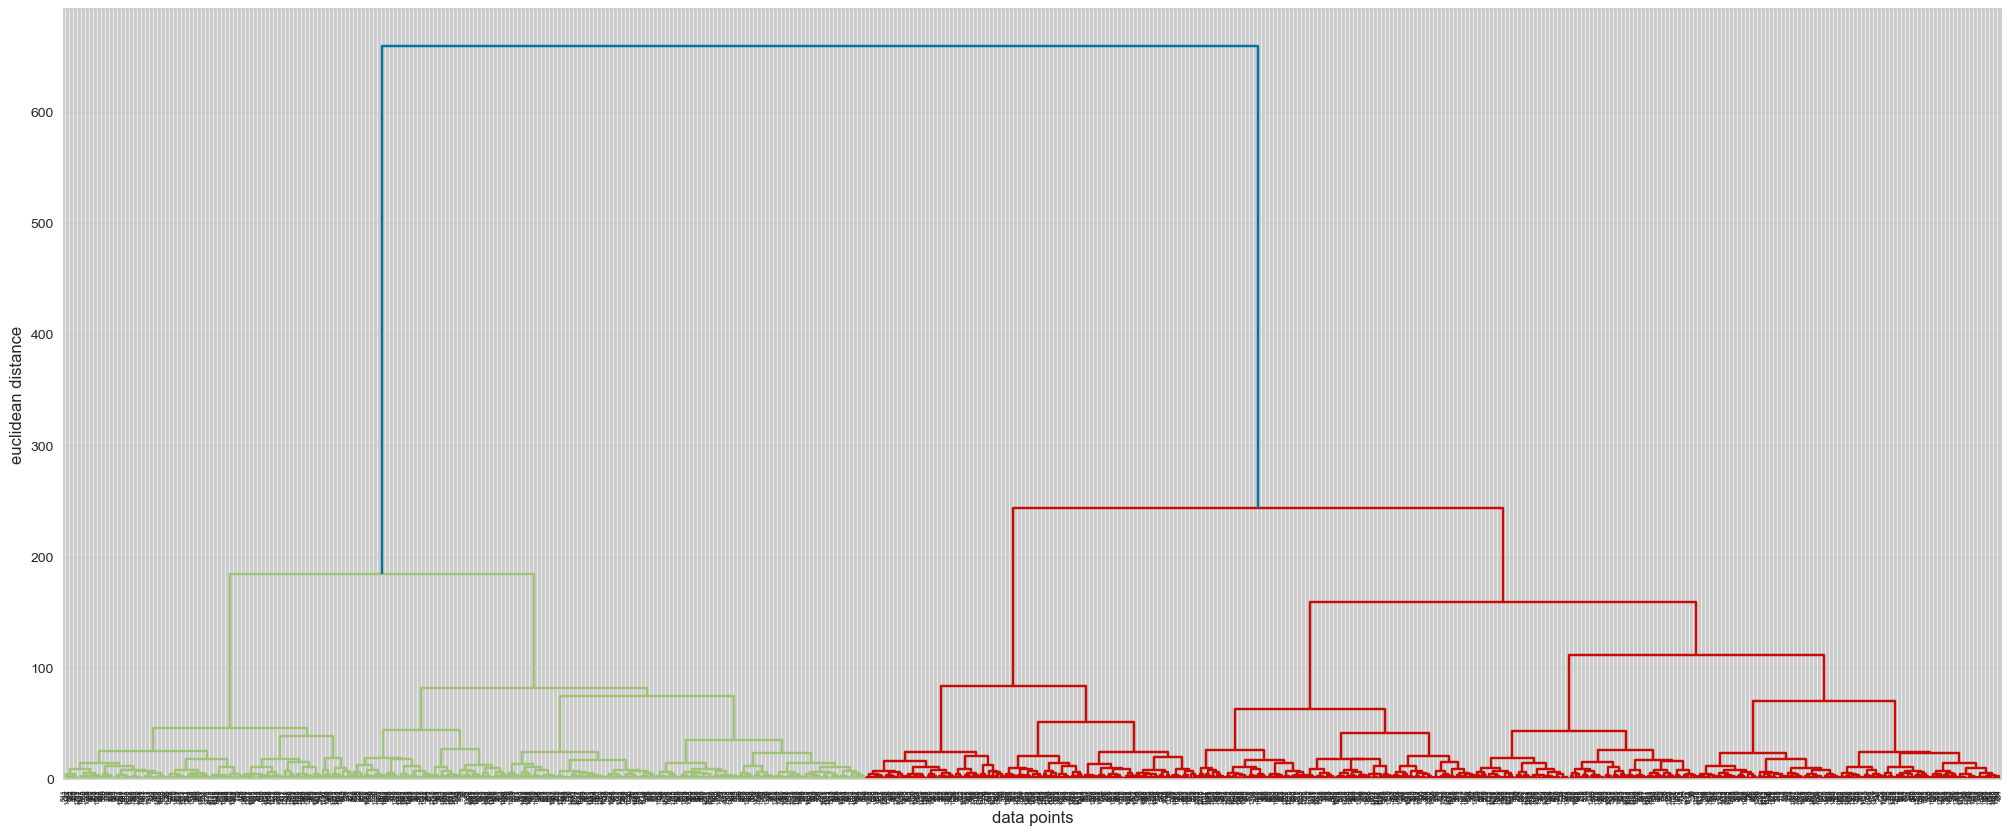

In [57]:
#create demogram and find the best clustering value
df_model = df.drop(['Gender'],axis=1)
merg = shc.linkage(df_model,method="ward")
plt.figure(figsize=(25,10))
shc.dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()


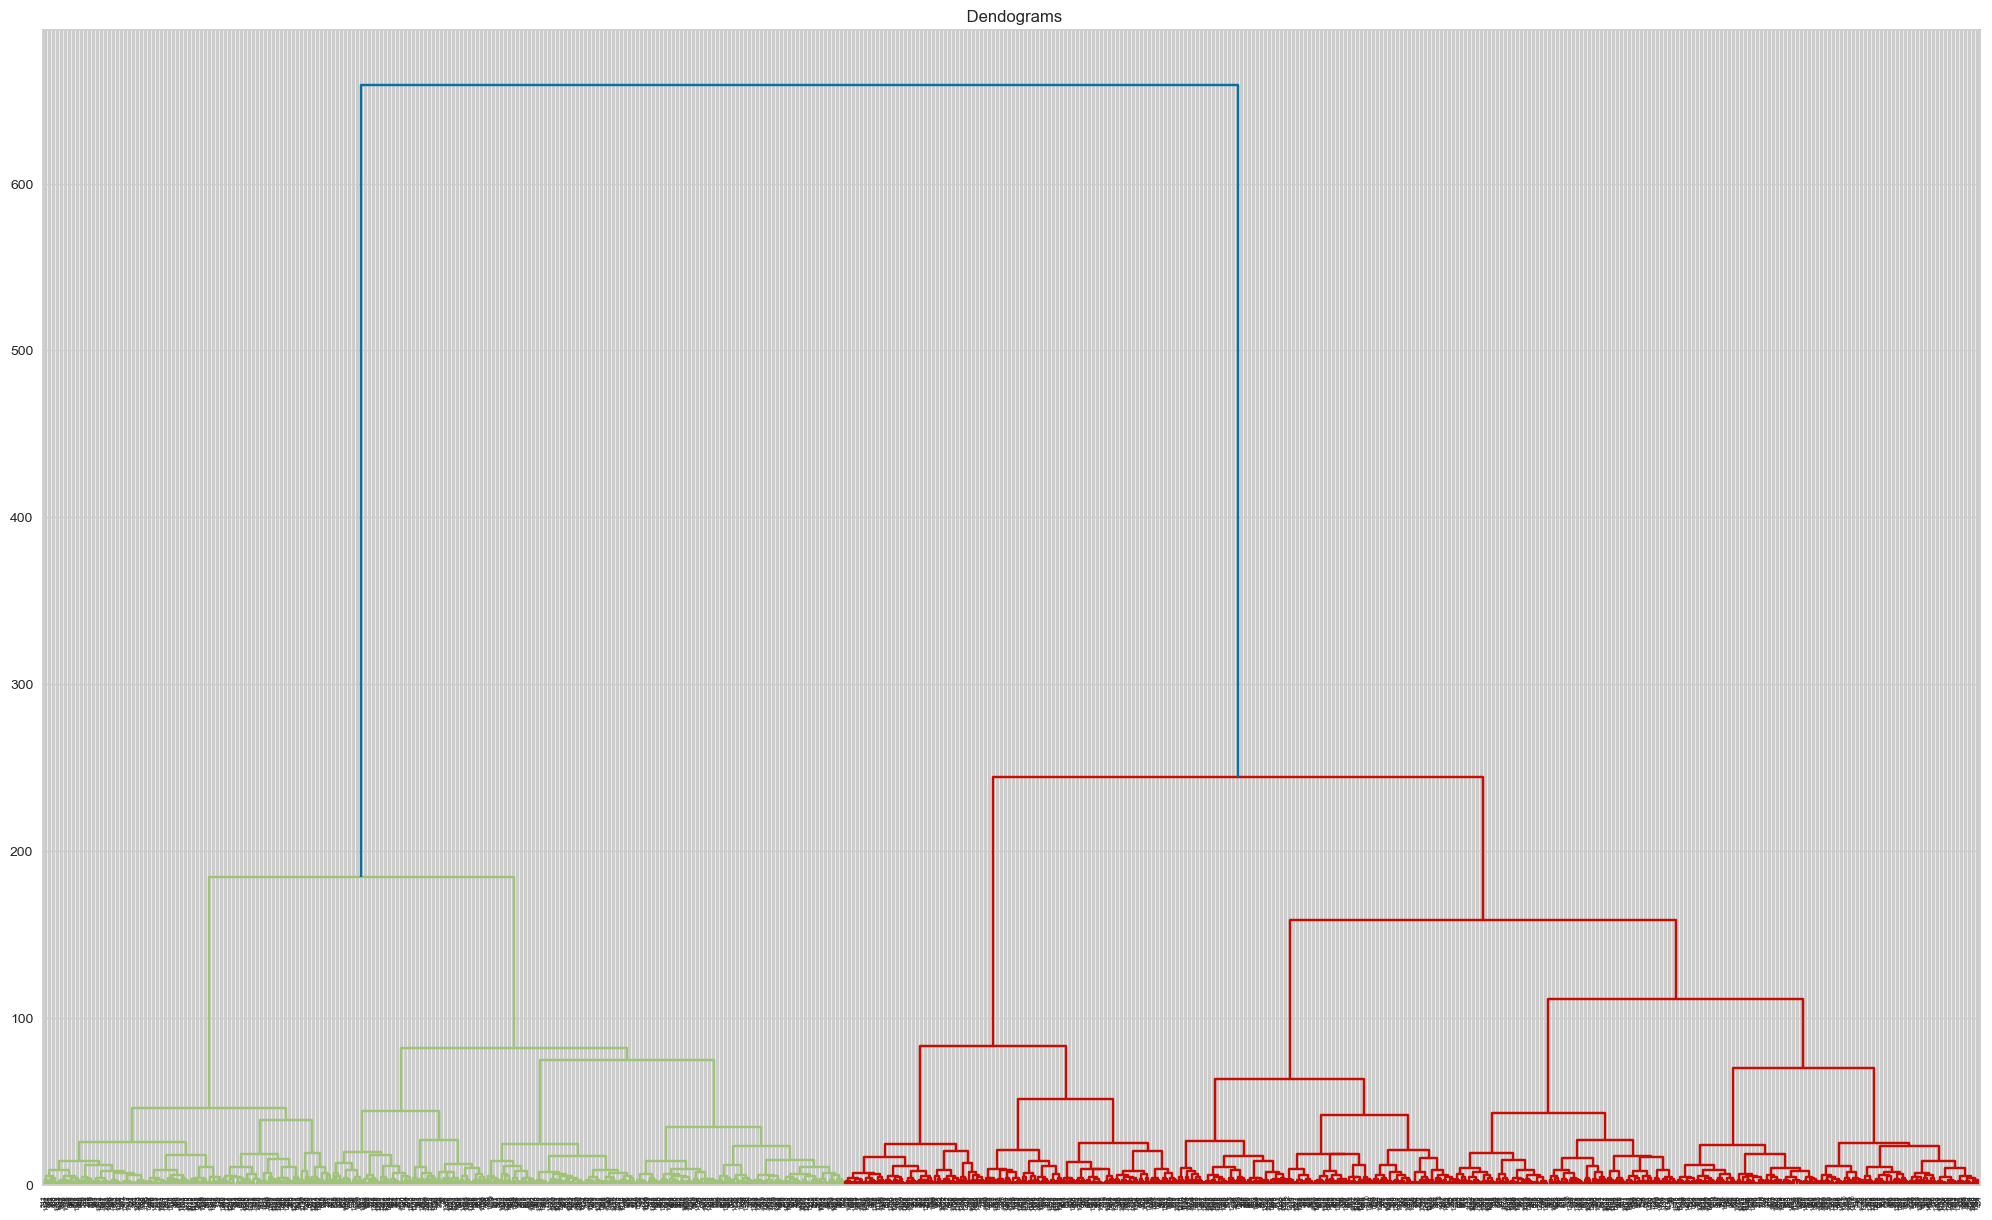

In [59]:
df_model = df.drop(['Gender'],axis=1)
plt.figure(figsize=(25, 15))
plt.title(" Dendograms")
dend = shc.dendrogram(shc.linkage(df_model, method='ward'))


In [60]:
hiyerartical_cluster = AgglomerativeClustering(n_clusters = 4,affinity= "euclidean",linkage = "ward")
hiyerartical_cluster.fit_predict(df_model)

/Users/sumitjena/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, ..., 0, 2, 1])

/Users/sumitjena/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


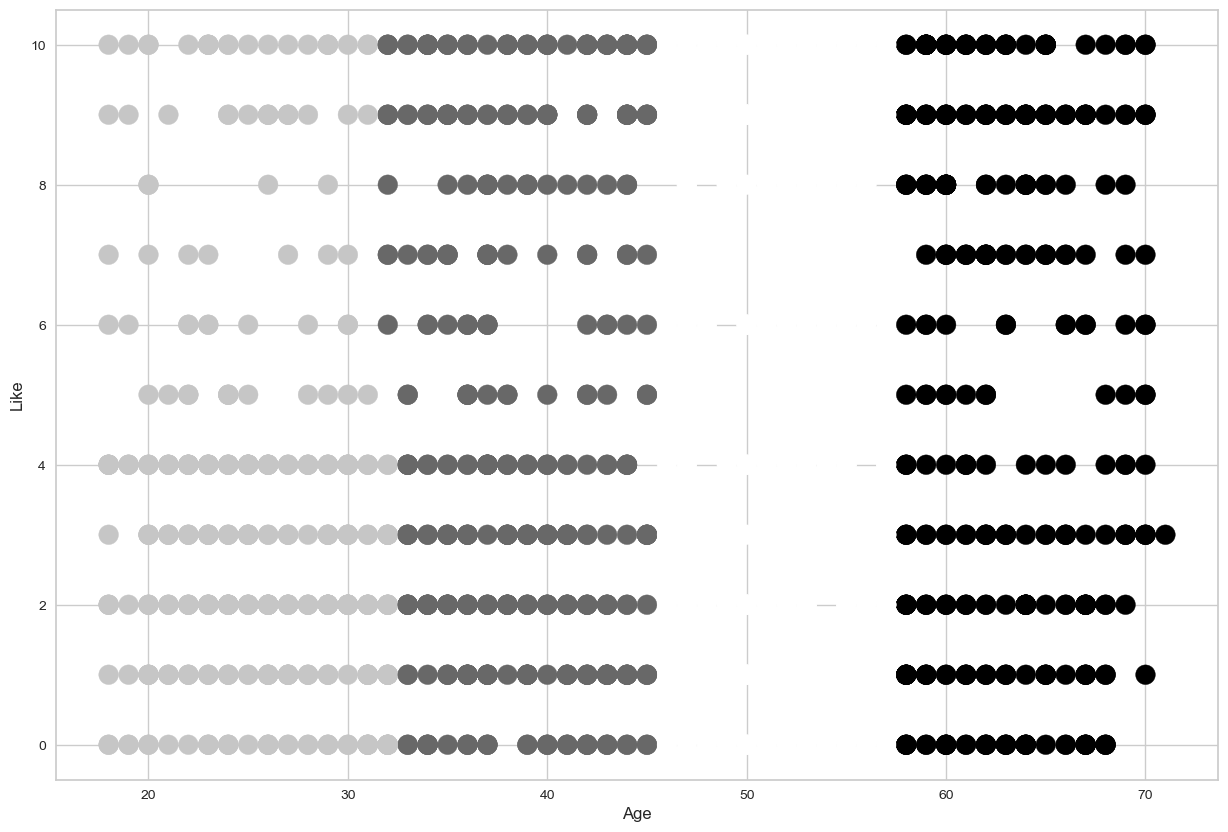

In [61]:
#create model
kmeans = KMeans(n_clusters=4)
df_predict = kmeans.fit_predict(df_model)

plt.figure(figsize=(15,10))
plt.scatter( x = 'Age' ,y = 'Like' , data = df_model , c = df_predict , s = 200 )
plt.xlabel("Age")
plt.ylabel("Like")
plt.show()

In [62]:
df_predict

array([3, 0, 3, ..., 0, 2, 1], dtype=int32)